In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
current = pd.read_csv("/Users/lucamasserano/Desktop/BOCCONI/nlp/final_project/lyrics_project/lyrics-Copy1.csv")
current.shape

(60040, 6)

In [4]:
current.loc[current.lyrics.notnull()].shape

(12200, 6)

In [5]:
total = 0
for genre in current.loc[current.lyrics.notnull()].genre.unique():
    print(genre, current.loc[current.lyrics.notnull()].loc[current.genre == genre, :].shape)
    total += current.loc[current.lyrics.notnull()].loc[current.genre == genre, :].shape[0]
print(total)

nan (0, 6)
Rock (3874, 6)
Hip-Hop (990, 6)
Other (108, 6)
Pop (2553, 6)
Folk (178, 6)
Electronic (354, 6)
Metal (73, 6)
Jazz (362, 6)
Indie (89, 6)
Country (708, 6)
R&B (225, 6)
9514


In [6]:
current.loc[current.genre.isnull(), :].shape

(12095, 6)

In [7]:
retrieved = current.loc[current.lyrics.notnull(), :]
retrieved.shape

(12200, 6)

In [7]:
retrieved.loc[retrieved.lyrics.apply(lambda x: len(x.split())) > 10000, :]

,artist,song,album,release_date,genre,lyrics
210,30 Seconds to Mars,Hidden To Label,NaN,NaN,NaN,Wage Labour and Capital KARL MARX Sh...
219,30 Seconds to Mars,The Struggle (hidden Track),NaN,NaN,NaN,Wage Labour and Capital KARL MARX Sh...
238,30 Seconds to Mars,The Reckoning,NaN,NaN,NaN,Wage Labour and Capital KARL MARX Sh...
252,5 Seconds Of Summer,Catch 22,NaN,1983-12-06,NaN,"Scarface By: Oliver Stone ""Enjoy yourself --..."
314,5 Seconds Of Summer,Girl That Cried Wolf,NaN,NaN,NaN,"THE TRAGEDY OF MACBETH, KING OF SCOTLAND Act ..."
624,88RISING,ALL OF OUR HEADS IN THE CLOUDS,2018 Genius User Listening Log,2018-01-01,Hip-Hop,"Last updated: 10/6/2018, 5:16PM MST OctoberOct..."
628,88RISING,Nothing Wrong,2018 Genius User Listening Log,2018-01-01,Hip-Hop,"Last updated: 10/6/2018, 5:16PM MST OctoberOct..."
630,88RISING,I Want In,2018 Genius User Listening Log,2018-01-01,Hip-Hop,"Last updated: 10/6/2018, 5:16PM MST OctoberOct..."
837,"10,000 Maniacs",The Earth Pressed Flat,Arabian Nights (Vol. 8),NaN,Rock,Hasan Of Bassorah. There was once of days of...
843,"10,000 Maniacs",Dark Eyed Sailor,NaN,NaN,Rock,1 INSERT - TV COMMERCIAL - DAY 1 Over jungle ...


In [61]:
for lyrics in retrieved.loc[retrieved.lyrics.apply(lambda x: len(x.split())) > 3000, :].lyrics:
    print(lyrics, end="\r")
    time.sleep(15)

KeyboardInterrupt: 

In [57]:
for length in retrieved.lyrics.apply(lambda x: len(x.split())):
    if length > 1000:
        print(length, end="\r")
        time.sleep(1.5)

KeyboardInterrupt: 

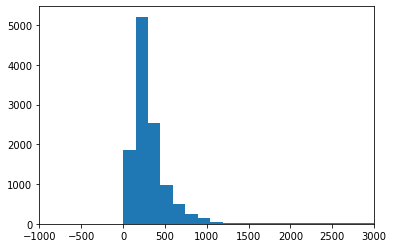

In [8]:
plt.hist(retrieved.lyrics.apply(lambda x: len(x.split())), bins=1000)
plt.xlim(left=-1000, right=3000)
plt.show()

In [12]:
retrieved.loc[retrieved.duplicated(subset=["artist", "song"]), :]#.loc[retrieved.artist == "The Chainsmokers", :]

,artist,song,album,release_date,genre,lyrics
149,2Pac,I Get Around,Strictly 4 My N.I.G.G.A.Z...,1993-06-10,NaN,"Round and round (aw yeah) Round and round, ro..."
680,2 Chainz,I'm Different,Based on a T.R.U. Story,2012-11-08,Hip-Hop,"Yeah Yeah 2 Chainz Mustard on the beat, ho! ..."
1070,10cc,The Things We Do For Love,Deceptive Bends,1977-05-28,Rock,{Intro} Too many broken hearts have fallen i...
1095,10cc,Rubber Bullets,10cc,1972-07-01,Rock,I went to a party at the local county jail All...
1101,10cc,I'm Mandy Fly Me,How Dare You!,1976-01-01,Rock,"Oh, no you'll never get me up in one of these..."
1125,10cc,Blackmail,The Original Soundtrack,1975-03-11,Rock,"She doesn't need money, she doesn't need diam..."
1195,3OH!3,You're Gonna Love This,OMENS,2012-07-10,Pop,"Yeah, I'm standing outside the bar like a fis..."
1416,4 Him,The Message,The Message,NaN,Pop,The fields are white and now the time has come...
1433,4 Him,Where There Is Faith,4him,NaN,Pop,I believe in faithfulness I believe in giving ...
1441,4 Him,Stay Forever,4him,NaN,Pop,Time waits for no one It's water thru our hand...


In [23]:
retrieved.shape[0] - retrieved.drop_duplicates(subset=["artist", "song"]).shape[0]

471

In [29]:
retrieved_date_not_null = retrieved.loc[retrieved.release_date.notnull(), :]
retrieved_date_not_null.loc[:, "year"] = retrieved_date_not_null.release_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
retrieved_date_not_null

/Users/lucamasserano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lucamasserano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,artist,song,album,release_date,genre,lyrics,year
0,6ix9ine,FEFE,DUMMY BOY,2018-07-22,NaN,"It's fuckin' TR3YWAY! King of New York, looki...",2018
1,6ix9ine,KEKE,DAY69: Graduation Day,2018-01-14,NaN,"Scum Gang! AM Nation I be on the block, on ...",2018
2,6ix9ine,TATI,DAY69: Graduation Day (Japanese Import),2018-05-27,NaN,"Hold up, let me get it started B.B. with the ...",2018
3,6ix9ine,BILLY,DAY69: Graduation Day,1417-06-12,NaN,"That's my word, get up in they face Talk your...",1417
4,6ix9ine,Gummo,DAY69: Graduation Day,2017-10-08,NaN,"Niggas iffy, uh, blicky got the stiffy, uh Go...",2017
5,6ix9ine,GOTTI,DAY69: Graduation Day,2018-04-10,NaN,Got me a new Rollie (You can't even afford th...,2018
6,6ix9ine,Kooda,DAY69: Graduation Day,2017-12-03,NaN,"Scum Gang! Niggas runnin' out they mouth, b...",2017
7,6ix9ine,RONDO,DAY69: Graduation Day,2018-02-22,NaN,I'ma do my dance in this bih (I'ma do my danc...,2018
8,6ix9ine,Blood Walk,NaN,2018-06-22,NaN,"Akademiks Music Suwoo! Gltt, brra, brra, brra...",2018
9,6ix9ine,GUMMO (Remix),DAY69: Graduation Day,2018-02-23,NaN,"Niggas iffy, uh, Blicky got the stiffy, uh Go...",2018


In [34]:
retrieved_date_not_null.shape

(7831, 7)

In [41]:
retrieved_date_not_null = retrieved_date_not_null.astype({"year": int})

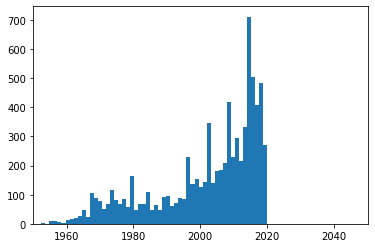

In [42]:
plt.hist(retrieved_date_not_null.loc[:, "year"], bins=500)
plt.xlim(left=1950)
plt.show()

In [44]:
retrieved_date_not_null.loc[retrieved_date_not_null.year > 2000].shape

(5070, 7)

In [46]:
retrieved_date_not_null.loc[(retrieved_date_not_null.year > 1980) & (retrieved_date_not_null.year < 2000)].shape

(1458, 7)